In [56]:
import os  # Importing the 'os' module for interacting with the operating system
import PIL  # Importing the 'PIL' module, used for handling images in Python
import shutil  # Importing the 'shutil' module, providing high-level file operations
import pathlib  # Importing the 'pathlib' module for working with filesystem paths
import numpy as np  # Importing the 'numpy' library for numerical computations in Python
import matplotlib.pyplot as plt  # Importing 'matplotlib.pyplot' for data visualization


In [57]:
! pip install tensorflow 

In [60]:
! pip install --upgrade tensorflow


In [61]:
import tensorflow as tf  # Importing TensorFlow, a popular machine learning framework in Python
from tensorflow import keras  # Importing the 'keras' submodule from TensorFlow for high-level neural network APIs
from tensorflow.keras import layers  # Importing the 'layers' module from Keras for defining neural network layers
from tensorflow.keras.models import Sequential, save_model  # Importing 'Sequential' model and 'save_model' function from Keras

In [43]:
dataset_url = "flower_photos"
# Defines the URL from where the dataset is present 

data_dir = "flower_photos"

data_dir = pathlib.Path(data_dir)
# Converts the obtained path (either to a file or directory) into a Path object using 'pathlib'.
# This allows for manipulation and traversal of the file path in an object-oriented way.

In [44]:
print(data_dir)

flower_photos


In [46]:
image_count = len(list(data_dir.glob('*/*.jpg')))
# Uses the 'glob' method from the 'pathlib' module to create a list of file paths.
# The expression '*/*/*.jpg' specifies a pattern to match all files with a '.jpg' extension in any subdirectory.
# 'data_dir.glob()' generates an iterator that yields paths matching the specified pattern.
# 'list()' converts this iterator to a list.
# 'len()' calculates the length of the list, which represents the total count of image files.

print("Total no. of images: ", image_count)
# Prints the total number of images found in the dataset directory.

Total no. of images:  3670


In [47]:
batch_size = 32
# Specifies the batch size, indicating the number of images that will be processed in each training iteration.
# A batch size of 32 means that during each training step, the model will process 32 images before updating its parameters.

img_height = 180
# Defines the height of the input images.
# Images will be resized or processed to have a height of 180 pixels.

img_width = 180
# Defines the width of the input images.
# Images will be resized or processed to have a width of 180 pixels.

In [49]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  # Splits the dataset into training and validation sets. Here, 20% of the data will be used for validation.
  subset="training",  # Specifies that this dataset is for training purposes.
  seed=123,  # Sets the seed for reproducibility when splitting the dataset.
  image_size=(img_height, img_width),  # Resizes the images to the specified height and width.
  batch_size=batch_size  # Sets the batch size for the training dataset.
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,  # Specifies the directory containing the validation dataset.
  validation_split=0.2,  # Splits the dataset into training and validation sets. Here, 20% of the data will be used for validation.
  subset="validation",  # Specifies that this dataset is for validation purposes.
  seed=123,  # Sets the seed for reproducibility when splitting the dataset.
  image_size=(img_height, img_width),  # Resizes the images to the specified height and width.
  batch_size=batch_size  # Sets the batch size for the validation dataset.
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [51]:
class_names = train_ds.class_names
# Retrieves the class names from the 'train_ds' dataset.
# These class names correspond to the subdirectories' names in the dataset directory, representing different categories or classes of images.

print("Class Names :", class_names)
# Prints the obtained class names.
# This line displays the list of class names that the model will learn to classify during training.


Class Names : ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [52]:
train_ds = train_ds.cache().shuffle(1000)
# Caches the training dataset 'train_ds', which helps in speeding up data retrieval during training by caching it in memory or on disk.
# The '.cache()' method stores the data after the first epoch, avoiding redundant preprocessing.
# The '.shuffle(1000)' method shuffles the training dataset with a buffer size of 1000, ensuring randomness in each batch during training.

val_ds = val_ds.cache()
# Caches the validation dataset 'val_ds'.
# Similar to the training dataset, caching improves performance by storing the validation data after the first epoch, reducing I/O overhead.

In [53]:
num_classes = len(class_names) # 5
# Calculates the number of classes by determining the length of the 'class_names' list.
# This line obtains the count of unique classes present in the dataset, which will be used as the number of output classes for the classification model.
# In this case, the comment "# 5" suggests that there are 5 unique classes in the dataset.


In [63]:
from tensorflow.keras.layers import Rescaling
model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # Rescaling layer: Normalizes pixel values to [0,1] by dividing by 255.
    # 'input_shape' specifies the input image dimensions (height, width, channels). Here, it's (img_height, img_width, 3) for RGB images.

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    # Convolutional layer with 16 filters, each using a 3x3 kernel.
    # 'padding='same'' adds padding to ensure the output has the same spatial dimensions as the input.
    # 'activation='relu'' applies the Rectified Linear Unit activation function.

    layers.MaxPooling2D(),
    # MaxPooling layer: Performs max pooling operation using a 2x2 window and a stride of 2 to downsample the feature maps.

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    # Another Convolutional layer with 32 filters, 3x3 kernel, 'padding='same'', and 'activation='relu''.

    layers.MaxPooling2D(),
    # Another MaxPooling layer.

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    # Another Convolutional layer with 64 filters, 3x3 kernel, 'padding='same'', and 'activation='relu''.

    layers.MaxPooling2D(),
    # Another MaxPooling layer.

    layers.Flatten(),
    # Flatten layer: Flattens the 3D output to 1D to prepare for fully connected layers.

    layers.Dense(128, activation='relu'),
    # Dense (fully connected) layer with 128 neurons and 'activation='relu''.

    layers.Dense(num_classes)
    # Output Dense layer with 'num_classes' neurons (number of output classes).
    # No activation specified here; it's common in multi-class classification to omit activation to get logits.
])

c:\Users\Utkarsh yadav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.compile(
    optimizer='adam',
    # Specifies the optimizer to be used during training. 'adam' is an efficient optimization algorithm for gradient-based optimization.

    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # Defines the loss function used for model training.
    # 'SparseCategoricalCrossentropy' computes the cross-entropy loss between true labels and predicted logits (before applying softmax).
    # 'from_logits=True' specifies that the model outputs logits, not probabilities.

    metrics=['accuracy']
    # Sets the evaluation metric(s) to be monitored during training.
    # Here, 'accuracy' is used as the metric to track the classification accuracy of the model.
)


In [65]:
# get inforamtion about layers present in model , shape of output and number of parameters in each layer
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

None


In [66]:
print("Model Training....")

Model Training....


In [67]:
epochs = 50
# Specifies the number of epochs (iterations over the entire dataset) for training the model.

history = model.fit(
  train_ds,
  # Training dataset used for model training.

  validation_data=val_ds,
  # Validation dataset used for evaluating the model's performance after each epoch.

  epochs=epochs
  # Number of epochs for which the model will be trained.
)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 227ms/step - accuracy: 0.4238 - loss: 1.3647 - val_accuracy: 0.5804 - val_loss: 1.0367
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.6265 - loss: 0.9554 - val_accuracy: 0.6131 - val_loss: 0.9867
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - accuracy: 0.6969 - loss: 0.7799 - val_accuracy: 0.6540 - val_loss: 0.9219
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.7720 - loss: 0.6201 - val_accuracy: 0.6703 - val_loss: 0.8786
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.8643 - loss: 0.3805 - val_accuracy: 0.6512 - val_loss: 0.9874
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.9132 - loss: 0.2460 - val_accuracy: 0.6689 - val_loss: 1.1674
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.9563 - loss: 0.1428 - val_accuracy: 0.6826 - val_loss: 1.2164
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.9880 - loss: 0.0604 - val_accu

In [68]:
print("Training Complete!")

Training Complete!


In [69]:
acc = history.history['accuracy']
# Retrieves the training accuracy for each epoch from the 'history' object.
# 'accuracy' corresponds to the accuracy metric on the training dataset.

val_acc = history.history['val_accuracy']
# Retrieves the validation accuracy for each epoch from the 'history' object.
# 'val_accuracy' corresponds to the accuracy metric on the validation dataset.

In [70]:
loss = history.history['loss']
# Retrieves the training loss for each epoch from the 'history' object.
# 'loss' corresponds to the loss metric on the training dataset.

val_loss = history.history['val_loss']
# Retrieves the validation loss for each epoch from the 'history' object.
# 'val_loss' corresponds to the loss metric on the validation dataset.

In [71]:
epochs_range = range(epochs)
# Creates a range of values representing the number of epochs.
# 'epochs_range' is a range object that starts from 0 (the first epoch) and ends at 'epochs - 1'.
# It is often used for setting the x-axis values when plotting metrics against epochs during visualization.

Text(0.5, 1.0, 'Training and Validation Accuracy')

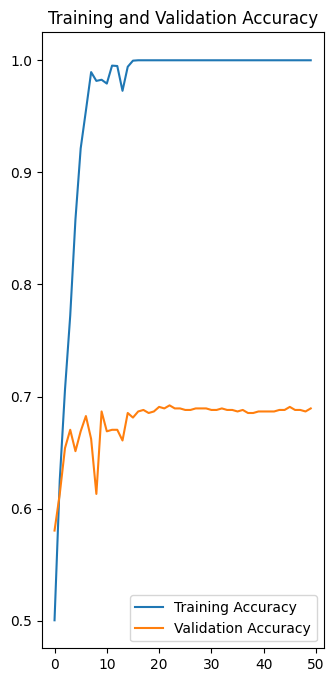

In [72]:
plt.figure(figsize=(8, 8))
# Creates a new figure for the plot with a size of 8x8 inches.

plt.subplot(1, 2, 1)
# Creates a subplot within the figure: 1 row, 2 columns, and this plot is the first one.

plt.plot(epochs_range, acc, label='Training Accuracy')
# Plots the training accuracy values against the number of epochs.
# 'epochs_range' represents the x-axis (epochs), 'acc' represents the y-axis (training accuracy).
# The 'label' parameter sets the label for the 'Training Accuracy' line in the plot.

plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# Plots the validation accuracy values against the number of epochs.
# 'epochs_range' represents the x-axis (epochs), 'val_acc' represents the y-axis (validation accuracy).
# The 'label' parameter sets the label for the 'Validation Accuracy' line in the plot.

plt.legend(loc='lower right')
# Displays the legend on the plot, placing it in the lower right corner.
# The legend shows the labels of the plotted lines ('Training Accuracy' and 'Validation Accuracy').

plt.title('Training and Validation Accuracy')
# Sets the title of the subplot as 'Training and Validation Accuracy'.


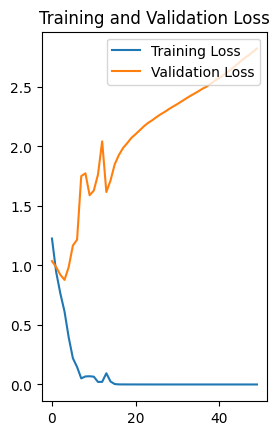

In [74]:
plt.subplot(1, 2, 2)
# Creates the second subplot in a 1x2 grid within the figure.

plt.plot(epochs_range, loss, label='Training Loss')
# Plots the training loss values against the number of epochs.
# 'epochs_range' represents the x-axis (epochs), 'loss' represents the y-axis (training loss).
# The 'label' parameter sets the label for the 'Training Loss' line in the plot.

plt.plot(epochs_range, val_loss, label='Validation Loss')
# Plots the validation loss values against the number of epochs.
# 'epochs_range' represents the x-axis (epochs), 'val_loss' represents the y-axis (validation loss).
# The 'label' parameter sets the label for the 'Validation Loss' line in the plot.

plt.legend(loc='upper right')
# Displays the legend on the plot, placing it in the upper right corner.
# The legend shows the labels of the plotted lines ('Training Loss' and 'Validation Loss').

plt.title('Training and Validation Loss')
# Sets the title of the subplot as 'Training and Validation Loss'.

plt.show()
# Displays the entire figure containing the two subplots showing loss metrics.


In [75]:
save_model(model, 'flower_model_trained.hdf5')
# Saves the trained model to a file named 'flower_model_trained.hdf5'.
# The model is saved in the HDF5 file format, which stores both the model architecture and weights.

print("Model Saved")
# Prints a message to the console indicating that the model has been successfully saved.

Model Saved
